<a href="https://colab.research.google.com/github/PhuongAnh2212/VN-Traffic-Sign/blob/main/TestModel_YOLOv8_TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = "/content/drive/MyDrive/Capstone/Kaggle-VN-Road-Sign/traffic-sign.zip"  # Change this
extract_path = "/content/dataset"  # Folder where the dataset will be extracted

In [4]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Extracted files:", os.listdir(extract_path))

Extracted files: ['archive']


In [5]:
import os
import shutil
import random

# Define source and destination paths
image_dir = "/content/dataset/archive/images"  # Source images
label_dir = "/content/dataset/archive/labels"  # Source labels

# Define train, val, and test directories
train_img_dir = "/content/dataset/archive/split_dataset/images/train"
val_img_dir = "/content/dataset/archive/split_dataset/images/val"
test_img_dir = "/content/dataset/archive/split_dataset/images/test"

train_lbl_dir = "/content/dataset/archive/split_dataset/labels/train"
val_lbl_dir = "/content/dataset/archive/split_dataset/labels/val"
test_lbl_dir = "/content/dataset/archive/split_dataset/labels/test"

# Create directories if they don't exist
for dir_path in [train_img_dir, val_img_dir, test_img_dir, train_lbl_dir, val_lbl_dir, test_lbl_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Get all image files (JPG, PNG)
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Shuffle images for randomness
random.seed(42)  # Set seed for reproducibility
random.shuffle(image_files)

# Compute split indices
train_split = int(len(image_files) * 0.7)
val_split = int(len(image_files) * 0.15)
test_split = len(image_files) - train_split - val_split  # Ensure all images are assigned

# Split dataset
train_files = image_files[:train_split]
val_files = image_files[train_split:train_split + val_split]
test_files = image_files[train_split + val_split:]

# Function to move images and corresponding labels
def move_files(files, img_dest, lbl_dest):
    for file in files:
        shutil.move(os.path.join(image_dir, file), os.path.join(img_dest, file))
        label_file = file.rsplit(".", 1)[0] + ".txt"  # Convert image name to label name
        if os.path.exists(os.path.join(label_dir, label_file)):
            shutil.move(os.path.join(label_dir, label_file), os.path.join(lbl_dest, label_file))

# Move files into respective directories
move_files(train_files, train_img_dir, train_lbl_dir)
move_files(val_files, val_img_dir, val_lbl_dir)
move_files(test_files, test_img_dir, test_lbl_dir)

print(f"✅ Dataset split complete: {train_split} train, {val_split} val, {test_split} test!")

✅ Dataset split complete: 2251 train, 482 val, 483 test!


In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [9]:
from ultralytics import YOLO

# Load fine-tuned YOLO model
model = YOLO("/content/best.pt")  # Replace 'best.pt' with your fine-tuned model checkpoint

# Run inference on test set
results = model.predict(source="/content/dataset/archive/split_dataset/images/test", save=True, save_txt=True, conf=0.5)


print("✅ Model testing on test set completed!")


image 1/483 /content/dataset/archive/split_dataset/images/test/0003.jpg: 384x640 1 No Parking, 230.0ms
image 2/483 /content/dataset/archive/split_dataset/images/test/0005.jpg: 384x640 1 No Parking, 1 No U-Turn and No Left Turn, 201.2ms
image 3/483 /content/dataset/archive/split_dataset/images/test/0014.jpg: 384x640 1 No Parking, 200.8ms
image 4/483 /content/dataset/archive/split_dataset/images/test/0016.jpg: 384x640 1 No Parking, 199.4ms
image 5/483 /content/dataset/archive/split_dataset/images/test/0018.jpg: 384x640 1 No Parking, 223.5ms
image 6/483 /content/dataset/archive/split_dataset/images/test/0020.jpg: 384x640 1 No Parking, 203.5ms
image 7/483 /content/dataset/archive/split_dataset/images/test/0023.jpg: 384x640 1 No Parking, 198.2ms
image 8/483 /content/dataset/archive/split_dataset/images/test/0033.jpg: 384x640 2 No Parkings, 205.1ms
image 9/483 /content/dataset/archive/split_dataset/images/test/0037.jpg: 384x640 1 No Parking, 209.2ms
image 10/483 /content/dataset/archive/spl

In [11]:
import os
import numpy as np

# Paths to predictions and ground truth labels
pred_dir = "/content/runs/detect/predict2/labels"  # Folder where YOLO saved predictions
gt_dir = "/content/dataset/archive/split_dataset/labels/test"  # Ground truth labels

def load_labels(file_path):
    """Load labels from a .txt file. Returns an empty array if the file doesn't exist."""
    return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])

# Initialize counters
total_labels, total_correct = 0, 0

# Compare each test image label
for file in os.listdir(gt_dir):
    if file.endswith(".txt"):
        gt_labels = load_labels(os.path.join(gt_dir, file))  # Load ground truth
        pred_labels = load_labels(os.path.join(pred_dir, file))  # Load predictions

        total_labels += len(gt_labels)  # Count ground truth labels

        if pred_labels.size > 0 and gt_labels.size > 0:
            # Count correct class predictions (match GT classes to predictions)
            correct_predictions = sum(1 for gt in gt_labels if any(pred[0] == gt[0] for pred in pred_labels))
            total_correct += correct_predictions  # Accumulate correct class matches

# Compute Accuracy
accuracy = (total_correct / total_labels) * 100 if total_labels > 0 else 0
print(f"✅ Model Accuracy: {accuracy:.2f}% (Correct: {total_correct} / Total: {total_labels})")

<ipython-input-11-c42aa4257ed6>:10: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/0187.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])
<ipython-input-11-c42aa4257ed6>:10: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/2051.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])
<ipython-input-11-c42aa4257ed6>:10: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/2017.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])


✅ Model Accuracy: 74.46% (Correct: 933 / Total: 1253)


<ipython-input-14-5f7917bda71b>:5: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/0187.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])
<ipython-input-14-5f7917bda71b>:5: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/2051.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])
<ipython-input-14-5f7917bda71b>:5: UserWarning: loadtxt: input contained no data: "/content/dataset/archive/split_dataset/labels/test/2017.txt"
  return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])


📊 Precision: 0.840
📊 Recall: 0.745
📊 Approximate mAP: 0.395


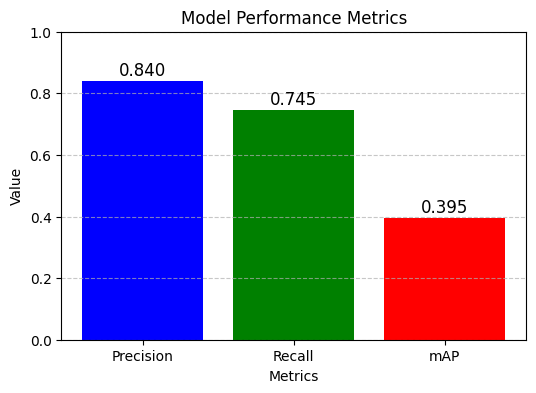

In [14]:
import matplotlib.pyplot as plt

def load_labels(file_path):
    """Load labels from a .txt file. Returns an empty array if the file doesn't exist."""
    return np.loadtxt(file_path, dtype=np.float32).reshape(-1, 5) if os.path.exists(file_path) else np.array([])

# Initialize metrics
total_labels, total_correct, total_pred = 0, 0, 0
true_positives, false_positives, false_negatives = 0, 0, 0

# Compare each test image label
for file in os.listdir(gt_dir):
    if file.endswith(".txt"):
        gt_labels = load_labels(os.path.join(gt_dir, file))  # Ground truth
        pred_labels = load_labels(os.path.join(pred_dir, file))  # Predictions

        total_labels += len(gt_labels)  # Count ground truth labels
        total_pred += len(pred_labels)  # Count predicted objects

        matched = 0
        for gt in gt_labels:
            if any(pred[0] == gt[0] for pred in pred_labels):  # Class match
                matched += 1  # True positive

        true_positives += matched
        false_positives += len(pred_labels) - matched  # Predicted but incorrect
        false_negatives += len(gt_labels) - matched  # Missed ground truths

# Compute Precision, Recall, and mAP
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
mAP = (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # Approximate F1-score

print(f"📊 Precision: {precision:.3f}")
print(f"📊 Recall: {recall:.3f}")
print(f"📊 Approximate mAP: {mAP:.3f}")

# Store metrics for plotting
metrics = {
    "Precision": precision,
    "Recall": recall,
    "mAP": mAP
}

# Plot the metrics
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.title("Model Performance Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.3f}", ha="center", fontsize=12)

plt.show()